# In questo documento andiamo a selezionare le feature singolarmente da ogni documento

In [7]:
# Importiamo le librerie

from os import listdir
from os.path import isfile, join
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [8]:
# Variabili globali

mypath = 'dataset'

# Questi campi non sono di interesse, quindi li escludiamo dalle analisi

first = ['Dst Port', 'Protocol', 'Timestamp']

In [9]:
# Mi vado a prendere i path di tutti i file nella cartella dataset

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [10]:
# Mi creo una cartella image all'interno del quale per ogni file vado a inserire le immagini d'interesse

if not os.path.exists("image"):
    os.makedirs("image")
    for a in onlyfiles:
        b = a.replace('.csv','')
        os.makedirs("image/"+b)
        os.makedirs("image/"+b+"/scatter")
        os.makedirs("image/"+b+"/istogrammi")

In [11]:
# In una sola lista andiamo a memorizzare tutti i dataframe dei documenti

all = [pd.read_csv("dataset/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv")]

'''for a in range(len(onlyfiles)):
    all.append(pd.read_csv(mypath+'/'+onlyfiles[a]))'''

"for a in range(len(onlyfiles)):\n    all.append(pd.read_csv(mypath+'/'+onlyfiles[a]))"

Text(0.5, 1.0, 'Fwd Seg Size Min')

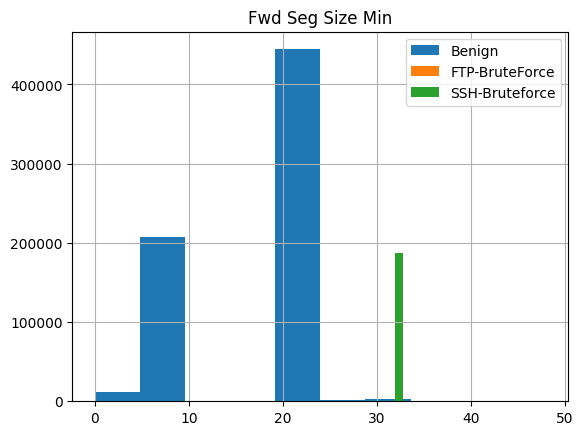

In [12]:
all[0][all[0]['Label'] == 'Benign']['Fwd Seg Size Min'].hist(label='Benign')
all[0][all[0]['Label'] == 'FTP-BruteForce']['Fwd Seg Size Min'].hist(label='FTP-BruteForce')
all[0][all[0]['Label'] == 'SSH-Bruteforce']['Fwd Seg Size Min'].hist(label='SSH-Bruteforce')
plt.legend()
plt.title('Fwd Seg Size Min')

In [13]:
print(all[0]['Flow Byts/s'].max())
print(all[0]['Label'].unique())

inf
['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']


# Per ogni documento andiamo a eseguire le operazioni di pre-processing, e a selezionare le feature d'interesse

In [14]:
for document,my_index in zip(all,range(1)): #len(onlyfiles) da sostituire

    scarto = []
    scarto.append([])
    folder = onlyfiles[7].replace('.csv','')
    attaccanti_label = document['Label'].unique()

    # Definisco una funzione per normalizzare i valori

    def normalize(feature:str):
        return (document[feature]-document[feature].mean())/np.std(document[feature])
    
    def normalize_plot(feature:str):
        return (document_plot[feature]-document_plot[feature].mean())/np.std(document_plot[feature])
    
    
    # Andiamo a eliminare i primi 3 campi inutili

    for a in first:
        document.drop(columns=a,axis=1,inplace=True)

    # Analisi della varianza, eliminiamo tutte le feature che hanno un solo valore

    for a in document.head(0):
        if(document[a].unique().shape[0] == 1):
            scarto[-1].append(a)
            document.drop(columns=a,axis=1,inplace=True)
        else:
            continue


    # Creo un duplicato solo per il plot 

    document_plot = document

    # Andiamo a sostituire le label con valori interi

    for b,c in zip(attaccanti_label,range(len(attaccanti_label))):
        document = document.replace(b, c)

    # Nel documento sono presenti valori infiniti, li andiamo a sostituire con Nan che verranno successivamente rimossi

    document.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Eliminiamo i valori nulli

    document.dropna(inplace=True)
    document_plot.dropna(inplace=True)

    # Andiamo a normalizzare i valori per poter usare i vari algoritmi di feature selection

    scaled_document = document.head(0)
    scaled_document_plot = document_plot.head(0)

    for a in document.head(0):
        if document[a].max() != 0 and a != 'Label':
            scaled_document[a] = normalize(a)
            scaled_document_plot[a] = normalize_plot(a)
        else:
            scaled_document[a] = document[a]
            scaled_document_plot[a] = document_plot[a]
            print("uguale a 0 " + str(a))

    # A questo punto andiamo a salvare gli histogrammi delle varie feature per effettuare analisi visive

    for h in scaled_document.head(0):

        # Stampo un istogramma per ogni valori di label, così da avere la suddivisione per colore

        for b,c in zip(attaccanti_label,range(len(attaccanti_label))):
            scaled_document[scaled_document['Label'] == c][h].hist(label=str(b))
            
        plt.legend()
        plt.title(h)

        feature_name = h.replace('/','_')
        plt.savefig('image/'+folder+'/'+'istogrammi/'+str(feature_name)+'.png')
        plt.close()
    

uguale a 0 Label


In [15]:
print(all[0]['Flow Byts/s'].max())

inf


Text(0.5, 1.0, 'Fwd Seg Size Min')

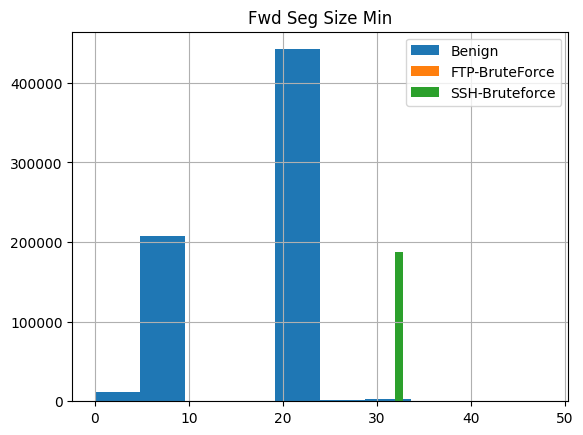

In [16]:
all[0][all[0]['Label'] == 'Benign']['Fwd Seg Size Min'].hist(label='Benign')
all[0][all[0]['Label'] == 'FTP-BruteForce']['Fwd Seg Size Min'].hist(label='FTP-BruteForce')
all[0][all[0]['Label'] == 'SSH-Bruteforce']['Fwd Seg Size Min'].hist(label='SSH-Bruteforce')
plt.legend()
plt.title('Fwd Seg Size Min')